In [ ]:
import pandas as pd
# base de dados iris
iris_df = pd.read_csv('https://raw.githubusercontent.com/Jeferson-Peter/iris-dataset/master/iris.csv')
#Separa a classe y 
x = iris_df.drop("variety", axis=1).values

In [8]:
from sklearn.cluster import DBSCAN
import numpy as np
iris_dbscan = DBSCAN(eps=0.5, min_samples=4)
iris_dbscan.fit(x)
labels = iris_dbscan.labels_
# label =-1 significa que o ponto é um outlier. o restante dos valores represente o número de....
print(labels)
#criando uma matrix numpy com todos os valores definidos como falsos por padrão
core_samples_mask = np.zeros_like(labels, dtype=bool)
#definimos pontos centrais  e de borda (todos os pontos que não são -1) como True
core_samples_mask[iris_dbscan.core_sample_indices_] = True
# encontrar o número de clusters em rótulos (ignorando o ruído, se houver)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# label = -1 significa que é um ponto de ruído (outlier).
n_noise_ = list(labels).count(-1)
print( "Número clusters estimado: %d" % n_clusters_)
print( "Número estimados de pontos de ruído: %d" % n_noise_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Número clusters estimado: 3
Número estimados de pontos de ruído: 13


In [ ]:
from sklearn import metrics
#encontrando os centróides finais
# centroids = clusters.cluster_centers_
#Avaliando a qualidade dos clusters
score_s = metrics.silhouette_score(x, labels, metric="euclidean")
print("Silhouette Score: %.4f" % score_s)
score_c = metrics.calinski_harabasz_score(x, labels)
print("Calinkski Harabasz Score: %.4f" % score_c) # quanto menor melhor
score_d = metrics.davies_bouldin_score(x, labels)
print("Davies Bouldin Score: %.4f" % score_d)

Silhouette Score: 0.3724
Calinkski Harabasz Score: 148.3000
Davies Bouldin Score: 3.0900


#Encontrando o valor ideal de EPS(Método Joelho)

[0.         0.         0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136 0.14142136
 0.17320508 0.17320508 0.17320508 0.17320508 0.17320508 0.17320508
 0.17320508 0.17320508 0.2        0.2        0.2        0.2
 0.2        0.2        0.2        0.2        0.2        0.2
 0.2236068  0.2236068  0.2236068  0.2236068  0.2236068  0.2236068
 0.2236068  0.2236068  0.2236068  0.2236068  0.24494897 0.24494897
 0.24494897 0.24494897 0.24494897 0.24494897 0.24494897 0.24494897
 0.24494897 0.24494897 0.24494897 0.24494897 0.26457513 0.26457513
 0.26457513 0.26457513 0

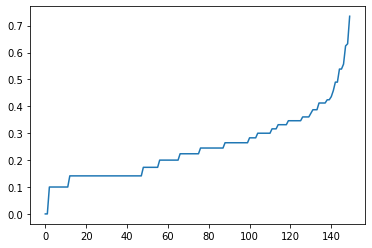

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(x)
distances, indices = nearest_neighbors.kneighbors(x)
distances = np.sort(distances, axis = 0)[:,1]
print(distances)
plt.plot(distances)
plt.show()
# o valor otimo deve ser o valor no qual vemos a curvatura máxima que neste caso parece estar em 0.5